<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/Customer_Advertising_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
#Load the historical customer data with their purchases (Mortgage, Savings, and Pension).
known_behaviors = pd.read_csv("known_behaviors2.csv")
known_behaviors.head()

,customer_id,age,age_youngest_child,debt_equity,gender,bad_payment,gold_card,pension_plan,household_debt_to_equity_ratio,income,members_in_household,months_current_account,months_customer,call_center_contacts,loan_accounts,number_products,number_transactions,non_worker_percentage,white_collar_percentage,rfm_score,Mortgage,Pension,Savings
0,15,45,12,45,0,0,0,0,65,13453,2,33,36,0,4,2,1,14,19,7.602,0,0,0
1,16,43,12,43,0,0,0,0,65,13453,2,34,36,0,0,3,2,14,19,10.143,0,0,0
2,30,23,0,23,0,0,0,0,65,13453,2,30,36,0,1,0,0,14,19,0.000,0,0,0
3,42,35,8,35,1,0,0,0,65,13453,2,22,24,0,1,0,0,14,19,0.000,0,1,0
4,52,43,12,43,1,0,0,0,47,14124,3,40,48,3,1,0,0,16,35,0.000,0,1,0


In [3]:
a = known_behaviors[known_behaviors.Mortgage == 1]
b = known_behaviors[known_behaviors.Pension == 1]
c = known_behaviors[known_behaviors.Savings == 1]
print("Number of clients: %d" %len(known_behaviors))
print("Number of clients predicted to buy mortgage accounts: %d" %len(a))
print("Number of clients predicted to buy pension accounts: %d" %len(b))
print("Number of clients predicted to buy savings accounts: %d" %len(c))

Number of clients: 11023
Number of clients predicted to buy mortgage accounts: 1664
Number of clients predicted to buy pension accounts: 2456
Number of clients predicted to buy savings accounts: 4222


In [4]:
known_behaviors["nb_products"] = known_behaviors.Mortgage + known_behaviors.Pension + known_behaviors.Savings

In [5]:
abc = known_behaviors[known_behaviors.nb_products > 1]
print("We have %d clients who bought several products" %len(abc))
abc = known_behaviors[known_behaviors.nb_products == 3]
print("We have %d clients who bought all the products" %len(abc))

We have 1650 clients who bought several products
We have 123 clients who bought all the products


In [6]:
products = ["Savings", "Mortgage", "Pension"]

In [7]:
def plot_cloud_points(df):
    figure = plt.figure(figsize=(20, 5))
    my_cm  = ListedColormap(['#bb0000', '#00FF00'])
    axes = {p : ('age', 'income') if p != "Mortgage"else ('members_in_household', 'loan_accounts') for p in products}
    for product in products:
        ax = plt.subplot(1, len(products), products.index(product)+1)
        ax.set_title(product)
        axe = axes[product]
        plt.xlabel(axe[0])
        plt.ylabel(axe[1])
        ax.scatter(df[axe[0]], df[axe[1]], c=df[product], cmap=my_cm, alpha=0.5)

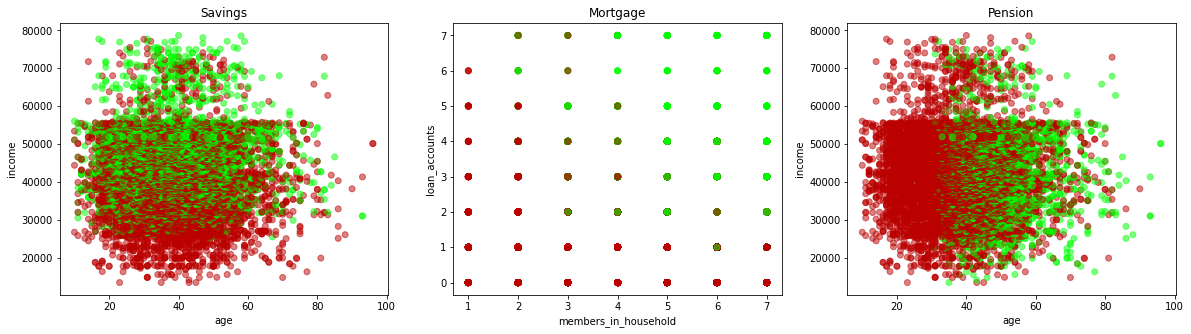

In [8]:
plot_cloud_points(known_behaviors)

In [9]:
known_behaviors.columns

Index(['customer_id', 'age', 'age_youngest_child', 'debt_equity', 'gender',
       'bad_payment', 'gold_card', 'pension_plan',
       'household_debt_to_equity_ratio', 'income', 'members_in_household',
       'months_current_account', 'months_customer', 'call_center_contacts',
       'loan_accounts', 'number_products', 'number_transactions',
       'non_worker_percentage', 'white_collar_percentage', 'rfm_score',
       'Mortgage', 'Pension', 'Savings', 'nb_products'],
      dtype='object')

In [10]:
cols = ['age', 'income', 'members_in_household', 'loan_accounts']

In [11]:
X = known_behaviors[cols]
ys = [known_behaviors[p] for p in products]

In [12]:
X.head()

,age,income,members_in_household,loan_accounts
0,45,13453,2,4
1,43,13453,2,0
2,23,13453,2,1
3,35,13453,2,1
4,43,14124,3,1


In [13]:
from sklearn import svm
from sklearn import ensemble

In [15]:
classifiers = []
for i,p in enumerate(products):
    clf = ensemble.GradientBoostingClassifier()
    clf.fit(X, ys[i])
    classifiers.append(clf)

In [16]:
unknown_behaviors = pd.read_csv("unknown_behaviors.csv")

In [17]:
for c in unknown_behaviors.columns:
    assert c in known_behaviors.columns

In [18]:
to_predict = unknown_behaviors[cols]

In [19]:
print("Number of new customers: %d" %len(unknown_behaviors))

Number of new customers: 2756


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
predicted = [classifiers[i].predict(to_predict) for i in range(len(products))]
for i,p in enumerate(products):
    to_predict[p] = predicted[i]
to_predict["id"] = unknown_behaviors["customer_id"]

In [22]:
offers = to_predict
offers.head()

,age,income,members_in_household,loan_accounts,Savings,Mortgage,Pension,id
0,38,47958.0,4,1,0,0,0,44256
1,30,48606.0,2,4,0,0,0,46883
2,41,42152.0,4,0,0,0,0,32387
3,42,39788.0,3,3,0,0,0,25504
4,42,44365.0,6,2,0,1,0,35979


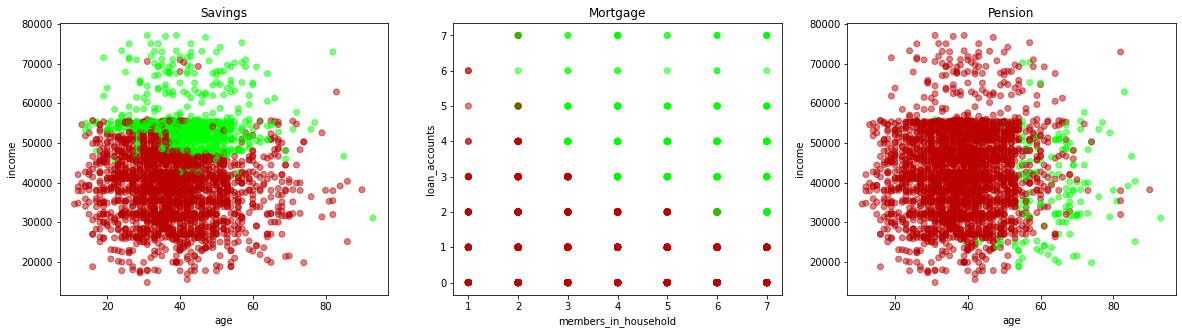

In [23]:
plot_cloud_points(offers)

In [24]:
a = offers[offers.Mortgage == 1]
b = offers[offers.Pension == 1]
c = offers[offers.Savings == 1]
print("Number of new customers: %d" %len(offers))
print("Number of customers predicted to buy mortgages: %d" %len(a))
print("Number of customers predicted to buy pensions: %d" %len(b))
print("Number of customers predicted to buy savings: %d" %len(c))

Number of new customers: 2756
Number of customers predicted to buy mortgages: 380
Number of customers predicted to buy pensions: 142
Number of customers predicted to buy savings: 713


In [25]:
to_predict["nb_products"] = to_predict.Mortgage + to_predict.Pension + to_predict.Savings

abc = to_predict[to_predict.nb_products > 1]
print("We predicted that %d clients would buy more than one product" %len(abc))
abc = to_predict[to_predict.nb_products == 3]
print("We predicted that %d clients would buy all three products" %len(abc))

We predicted that 112 clients would buy more than one product
We predicted that 0 clients would buy all three products


In [26]:
#select the best channel
offers.reset_index(inplace=True)

In [27]:
# How much revenue is earned when selling each product
productValue = [200, 300, 400]
value_per_product = {products[i] : productValue[i] for i in range(len(products))}

# Total available budget
availableBudget = 25000

# For each channel, cost of making a marketing action and success factor
channels =  pd.DataFrame(data=[("gift", 20.0, 0.20), 
                               ("newsletter", 15.0, 0.05), 
                               ("seminar", 23.0, 0.30)], columns=["name", "cost", "factor"])

offersR = range(0, len(offers))
productsR = range(0, len(products))
channelsR = range(0, len(channels))

In [ ]:
#Using a greedy algorithm
#We create a custom algorithm that ensures 10% of offers are made per channel by choosing the most promising per channel. The algorithm then continues to add offers until the budget is reached.
gsol = pd.DataFrame()
gsol['id'] = offers['id']

budget = 0
revenue = 0

for product in products:
    gsol[product] = 0
   
noffers = len(offers)

# ensure the 10% per channel by choosing the most promising per channel
for c in channelsR: #, channel in channels.iterrows():
    i = 0;
    while (i< ( noffers // 10 ) ):
        # find a possible offer in this channel for a customer not yet done
        added = False
        for o  in offersR:
            already = False
            for product in products:   
                if gsol.get_value(index=o, col=product) == 1:
                    already = True
                    break
            if already:
                continue
            possible = False
            possibleProduct = None
            for product in products:
                if offers.get_value(index=o, col=product) == 1:
                    possible = True
                    possibleProduct = product
                    break
            if not possible:
                 continue
            #print "Assigning customer ", offers.get_value(index=o, col="id"), " with product ", product, " and channel ", channel['name']
            gsol.set_value(index=o, col=possibleProduct, value=1)
            i = i+1
            added = True
            budget = budget + channels.get_value(index=c, col="cost")
            revenue = revenue + channels.get_value(index=c, col="factor")*value_per_product[product]            
            break
        if not added:
            print("NOT FEASIBLE")
            break

In [ ]:
# add more to complete budget       
while (True):
    added = False
    for c, channel in channels.iterrows():
        if (budget + channel.cost > availableBudget):
            continue
        # find a possible offer in this channel for a customer not yet done
        for o  in offersR:
            already = False
            for product in products:   
                if gsol.get_value(index=o, col=product) == 1:
                    already = True
                    break
            if already:
                continue
            possible = False
            possibleProduct = None
            for product in products:
                if offers.get_value(index=o, col=product) == 1:
                    possible = True
                    possibleProduct = product
                    break
            if not possible:
                continue
            #print "Assigning customer ", offers.get_value(index=o, col="id"), " with product ", product, " and channel ", channel['name']
            gsol.set_value(index=o, col=possibleProduct, value=1)
            i = i+1
            added = True
            budget = budget + channel.cost
            revenue = revenue + channel.factor*value_per_product[product]            
            break
    if not added:
        print("FINISH BUDGET")
        break
    
print(gsol.head())

FINISH BUDGET
      id  Savings  Mortgage  Pension
0  44256        0         0        0
1  46883        0         0        0
2  32387        0         0        0
3  25504        0         0        0
4  35979        0         1        0


In [ ]:
a = gsol[gsol.Mortgage == 1]
b = gsol[gsol.Pension == 1]
c = gsol[gsol.Savings == 1]

abc = gsol[(gsol.Mortgage == 1) | (gsol.Pension == 1) | (gsol.Savings == 1)]

print("Number of clients: %d" %len(abc))
print("Numbers of Mortgage offers: %d" %len(a))
print("Numbers of Pension offers: %d" %len(b))
print("Numbers of Savings offers: %d" %len(c))
print("Total Budget Spent: %d" %budget)
print("Total revenue: %d" %revenue)


comp1_df = pd.DataFrame(data=[["Greedy", revenue, len(abc), len(a), len(b), len(c), budget]], columns=["Algorithm","Revenue","Number of clients","Mortgage offers","Pension offers","Savings offers","Budget Spent"])

Number of clients: 1123
Numbers of Mortgage offers: 299
Numbers of Pension offers: 111
Numbers of Savings offers: 713
Total Budget Spent: 21712
Total revenue: 50800


In [ ]:
!pip install docplex
import sys
import docplex.mp

  Using cached https://files.pythonhosted.org/packages/7f/3a/a0aef3500c9b7dde37fef04f80650e7ff4a72083b680e2d509c8a648cd36/docplex-2.8.125.tar.gz
  Using cached https://files.pythonhosted.org/packages/20/06/108c6b707ee06c598011f8150affd909be8611bd82847cd9bf45f0c5927d/docloud-1.0.365.tar.gz
  Running setup.py bdist_wheel for docplex ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/6b/25/4a/4333443de30efca01e841f947af90554400d035b2decf97326
  Running setup.py bdist_wheel for docloud ... - done
  Stored in directory: /root/.cache/pip/wheels/1a/83/f5/36d5e872d9fda9f3d05e0544dca2c1fde9d66acd201990bb17
Successfully built docplex docloud


In [ ]:
url = "https://api-oaas.docloud.ibmcloud.com/job_manager/rest/v1/"
key = "api_5c6d053e-4e52-4b7f-80dc-f8e69c1ffb83"

In [ ]:
from docplex.mp.context import Context
context = Context.make_default_context()

context.solver.docloud.url = url
context.solver.docloud.key = key
context.solver.agent = 'docloud'

In [ ]:
from docplex.mp.model import Model

mdl = Model(name="marketing_campaign", checker='on', context=context)

In [ ]:
#Define the decision variables
#The integer decision variables channelVars, represent whether or not a customer will be made an offer for a particular product via a particular channel.
#The integer decision variable totaloffers represents the total number of offers made.
#The continuous variable budgetSpent represents the total cost of the offers made.
channelVars = mdl.binary_var_cube(offersR, productsR, channelsR)

In [ ]:
#Set up the constraints
#Offer only one product per customer.
#Compute the budget and set a maximum on it.
#Compute the number of offers to be made.
#Ensure at least 10% of offers are made via each channel.
# At most 1 product is offered to each customer
mdl.add_constraints( mdl.sum(channelVars[o,p,c] for p in productsR for c in channelsR) <=1
                   for o in offersR)

# Do not exceed the budget
mdl.add_constraint( mdl.sum(channelVars[o,p,c]*channels.get_value(index=c, col="cost") 
                                           for o in offersR 
                                           for p in productsR 
                                           for c in channelsR)  <= availableBudget, "budget")  

# At least 10% offers per channel
for c in channelsR:
    mdl.add_constraint(mdl.sum(channelVars[o,p,c] for p in productsR for o in offersR) >= len(offers) // 10)

mdl.print_information()

Model: marketing_campaign
 - number of variables: 74412
   - binary=74412, integer=0, continuous=0
 - number of constraints: 2760
   - linear=2760
 - parameters: defaults


In [ ]:
#objective
obj = 0

for c in channelsR:
    for p in productsR:
        product=products[p]
        coef = channels.get_value(index=c, col="factor") * value_per_product[product]
        obj += mdl.sum(channelVars[o,p,c] * coef* offers.get_value(index=o, col=product) for o in offersR)

mdl.maximize(obj)

In [ ]:
mdl.parameters.timelimit = 30

In [ ]:
s = mdl.solve()
assert s, "No Solution !!!"

In [ ]:
print(mdl.get_solve_status())
print(mdl.get_solve_details())

JobSolveStatus.OPTIMAL_SOLUTION
status  = integer optimal solution
time    = 1.73893 s.
problem = MILP
gap     = 0%



In [ ]:
#analyse the solution
totaloffers = mdl.sum(channelVars[o,p,c] 
                      for o in offersR
                      for p in productsR 
                      for c in channelsR)
mdl.add_kpi(totaloffers, "nb_offers")

budgetSpent = mdl.sum(channelVars[o,p,c]*channels.get_value(index=c, col="cost") 
                                           for o in offersR 
                                           for p in productsR 
                                           for c in channelsR)
mdl.add_kpi(budgetSpent, "budgetSpent")

for c in channelsR:
    channel = channels.get_value(index=c, col="name")
    kpi = mdl.sum(channelVars[o,p,c] for p in productsR for o in offersR)
    mdl.add_kpi(kpi, channel)

for p in productsR:
    product = products[p]
    kpi = mdl.sum(channelVars[o,p,c] for c in channelsR for o in offersR)
    mdl.add_kpi(kpi, product)

In [ ]:
mdl.report()

comp2_df = pd.DataFrame(data=[["CPLEX", mdl.objective_value, mdl.kpi_value_by_name('nb_offers'), mdl.kpi_value_by_name('Mortgage'), mdl.kpi_value_by_name('Pension'), mdl.kpi_value_by_name('Savings'), mdl.kpi_value_by_name('budgetSpent')]], columns=["Algorithm","Revenue","Number of clients","Mortgage offers","Pension offers","Savings offers","Budget Spent"])

* model marketing_campaign solved with objective = 72620.000
*  KPI: nb_offers   = 1218.000
*  KPI: budgetSpent = 24989.000
*  KPI: gift        = 275.000
*  KPI: newsletter  = 275.000
*  KPI: seminar     = 668.000
*  KPI: Savings     = 690.000
*  KPI: Mortgage    = 381.000
*  KPI: Pension     = 147.000


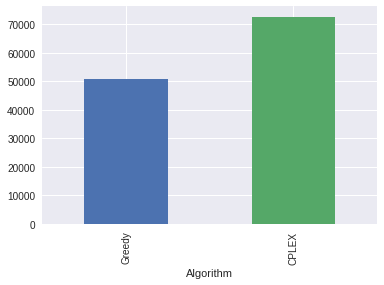

In [ ]:
comp_df = comp1_df.append(comp2_df, ignore_index=True)
comp_df

comp_df.set_index("Algorithm", inplace=True)
    
my_plot = comp_df['Revenue'].plot(kind='bar')

In [ ]:
#get the hand on the budget constraint
ct = mdl.get_constraint_by_name("budget")

In [ ]:
res = []
for i in range(20):
    ct.rhs = availableBudget+1000*i
    s = mdl.solve()
    assert s, "No Solution !!!"
    res.append((availableBudget+1000*i, mdl.objective_value, mdl.kpi_value_by_name("nb_offers"), mdl.kpi_value_by_name("budgetSpent")))

In [ ]:
mdl.report()

* model marketing_campaign solved with objective = 87120.000
*  KPI: nb_offers   = 1696.000
*  KPI: budgetSpent = 35983.000
*  KPI: gift        = 275.000
*  KPI: newsletter  = 275.000
*  KPI: seminar     = 1146.000
*  KPI: Savings     = 1138.000
*  KPI: Mortgage    = 405.000
*  KPI: Pension     = 153.000


In [ ]:
pd.DataFrame(res, columns=["budget", "revenue", "nb_offers", "budgetSpent"])

,budget,revenue,nb_offers,budgetSpent
0,25000,72620.0,1218,24989.0
1,26000,74800.0,1262,25998.0
2,27000,76970.0,1305,26990.0
3,28000,79150.0,1349,27999.0
4,29000,81320.0,1392,28991.0
5,30000,82360.0,1436,30000.0
6,31000,83240.0,1479,30992.0
7,32000,84100.0,1522,31981.0
8,33000,84980.0,1566,32993.0
9,34000,85840.0,1609,33982.0


In [ ]:
ct.rhs = 0

In [ ]:
s = mdl.solve()

In [ ]:
if not s:
    #rename the constraint with a "low" prefix to automatically put a low priority on it.
    ct.name = "low_budget"
    #setting all bool vars to 0 is an easy relaxation, so let's refuse it and force to offer something to 1/3 of the clients
    mdl.add_constraint(totaloffers >= len(offers)//20, ctname="high")
    
    # solve has failed, we try relaxation, based on constraint names
    # constraints are prioritized according to their names
    # if a name contains "low", it has priority LOW
    # if a ct name contains "medium" it has priority MEDIUM
    # same for HIGH
    # if a constraint has no name or does not match any, it is not relaxable.
    from docplex.mp.relaxer import Relaxer
    relaxer = Relaxer(prioritizer='match', verbose=True)

    relaxed_sol = relaxer.relax(mdl)
    relaxed_ok = relaxed_sol is not None
    assert relaxed_ok, "relaxation failed"
    relaxer.print_information()

-- starting relaxation. mode: OptSum, precision=1e-05
-> relaxation #1 starts with priority: LOW, #relaxables=1
<- relaxation #1 succeeds: priority: LOW, #relaxables=1, obj=47580.00000060869, #relaxations=1
* number of relaxations: 1
 - relaxed: low_budget, with relaxation: 15950.0000002
* total absolute relaxation: 15950.0000002


In [ ]:
mdl.report()
print(mdl.get_solve_status())
print(mdl.get_solve_details())

* model marketing_campaign solved with objective = 47580.000
*  KPI: nb_offers   = 825.000
*  KPI: budgetSpent = 15950.000
*  KPI: gift        = 275.000
*  KPI: newsletter  = 275.000
*  KPI: seminar     = 275.000
*  KPI: Savings     = 309.000
*  KPI: Mortgage    = 374.000
*  KPI: Pension     = 142.000
JobSolveStatus.INFEASIBLE_SOLUTION
status  = optimal relaxed sum of infeasibilities
time    = 0.580835 s.
problem = MILP
gap     = 0%

